In [481]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [482]:
RANGE=120
HOSPITAL_OFFSET=7
ICU_OFFSET=14
FONT_SIZE=12
DEATH_DELAY=3

In [483]:
df_cases=pd.read_csv('https://www.opendata.nhs.scot/dataset/b318bddf-a4dc-4262-971f-0ba329e09b87/resource/287fc645-4352-4477-9c8c-55bc054b7e76/download/daily_cuml_scot_20211206.csv', index_col='Date',parse_dates=True)
df_hospital=pd.read_csv('https://www.opendata.nhs.scot/dataset/b318bddf-a4dc-4262-971f-0ba329e09b87/resource/2dd8534b-0a6f-4744-9253-9565d62f96c2/download/trend_hb_20211206.csv', index_col='Date',parse_dates=True)

df_hospital=df_hospital[df_hospital['HBName']=='Scotland']

In [487]:
df_hospital.tail()

,HB,HBName,DailyPositive,CumulativePositive,CrudeRatePositive,CrudeRate7DayPositive,DailyDeaths,CumulativeDeaths,CrudeRateDeaths,DailyNegative,...,PositivePercentage,PositivePercentage7Day,TotalPillar1,TotalPillar2,HospitalAdmissions,HospitalAdmissionsQF,ICUAdmissions,ICUAdmissionsQF,PositivePillar1,PositivePillar2
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-24,S92000003,Scotland,8716,862680,15782.656422,1076.472741,1,9835,179.930479,4690,...,27.765088,18.605280,9125,27212,NaN,:,9.0,NaN,512,9577
2021-12-25,S92000003,Scotland,4466,867146,15864.361508,1068.203439,0,9835,179.930479,1839,...,36.619411,19.639876,2761,10994,NaN,:,3.0,NaN,209,4828
2021-12-26,S92000003,Scotland,6722,873868,15987.339920,1094.804244,1,9836,179.948774,3224,...,30.945885,20.849796,5832,18727,NaN,:,6.0,NaN,426,7174
2021-12-27,S92000003,Scotland,11829,885697,16203.750457,1163.483352,0,9836,179.948774,5915,...,28.475680,23.560579,13317,34278,NaN,:,6.0,NaN,776,12777
2021-12-28,S92000003,Scotland,367,886064,16210.464691,992.517380,0,9836,179.948774,413,...,13.038313,25.417676,2827,540,NaN,:,7.0,NaN,260,179


ValueError: cannot convert float NaN to integer

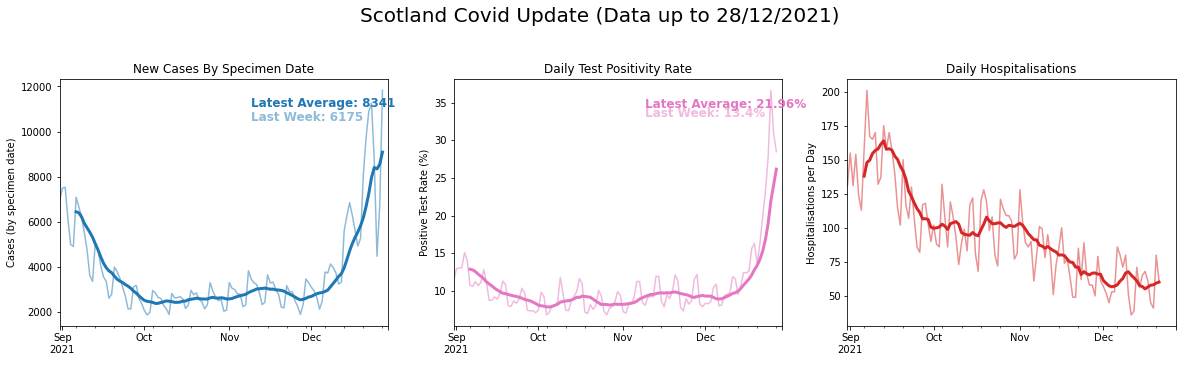

In [484]:
fig=plt.figure(figsize=(20,10))
fig.suptitle('Scotland Covid Update (Data up to '+df_cases.index[-1].strftime("%d/%m/%Y")+")", fontsize=20)

#
# Cases
#

plt.subplot(2,3,1)

df_cases['DailyCases'].iloc[-RANGE:-1].plot(alpha=0.5)
df_cases['DailyCases'].iloc[-RANGE:-1].rolling(window=7).mean().plot(lw=3,c='C0')

plt.ylabel('Cases (by specimen date)')
plt.xlabel(' ')
plt.title('New Cases By Specimen Date')

axes = plt.gca()
y_min, y_max = axes.get_ylim()

plt.text(s='Latest Average: '+str(int(df_cases['DailyCases'].iloc[-RANGE:-1].rolling(window=7).mean()[-3])),x=df_cases['DailyCases'].index[-50],y=0.9*y_max,c='C0', fontsize=FONT_SIZE, weight='bold')
plt.text(s='Last Week: '+str(int(df_cases['DailyCases'].iloc[-RANGE:-8].rolling(window=7).mean()[-1])),x=df_cases['DailyCases'].index[-50],y=0.85*y_max,c='C0', fontsize=FONT_SIZE, weight='bold',alpha=0.5)

x_min, x_max = axes.get_xlim()
axes.set_xlim(x_min, x_max+2)

#
# Pos Rate
#

plt.subplot(2,3,2)
df_hospital['PositivePercentage'].iloc[-RANGE:-1].plot(alpha=0.5,c='C6')
df_hospital['PositivePercentage'].iloc[-RANGE:-1].rolling(window=7).mean().plot(lw=3,c='C6')

plt.ylabel('Positive Test Rate (%)')
plt.xlabel(' ')
plt.title('Daily Test Positivity Rate')

axes = plt.gca()
y_min, y_max = axes.get_ylim()

plt.text(s='Latest Average: '+str(np.round(df_hospital['PositivePercentage'].iloc[-RANGE:-1].rolling(window=7).mean()[-3],2))+'%',x=df_hospital['PositivePercentage'].index[-50],y=0.9*y_max,c='C6', fontsize=FONT_SIZE, weight='bold')
plt.text(s='Last Week: '+str(np.round(df_hospital['PositivePercentage'].iloc[-RANGE:-8].rolling(window=7).mean()[-1],2))+'%',x=df_hospital['PositivePercentage'].index[-50],y=0.87*y_max,c='C6', fontsize=FONT_SIZE, weight='bold',alpha=0.5)

x_min, x_max = axes.get_xlim()
axes.set_xlim(x_min, x_max+2)

#
# Hospital Admissions
#

plt.subplot(2,3,3)
df_hospital['HospitalAdmissions'].iloc[-RANGE:-1].plot(alpha=0.5,c='C3')
df_hospital['HospitalAdmissions'].iloc[-RANGE:-1].rolling(window=7).mean().plot(lw=3,c='C3')

plt.ylabel('Hospitalisations per Day')
plt.xlabel(' ')
plt.title('Daily Hospitalisations')

axes = plt.gca()
y_min, y_max = axes.get_ylim()

plt.text(s='Latest Average: '+str(int(df_hospital['HospitalAdmissions'].iloc[-RANGE:-1].rolling(window=7).mean()[-3])),x=df_hospital['HospitalAdmissions'].index[-50],y=0.9*y_max,c='C3', fontsize=FONT_SIZE, weight='bold')
plt.text(s='Last Week: '+str(int(df_hospital['HospitalAdmissions'].iloc[-RANGE:-8].rolling(window=7).mean()[-1])),x=df_hospital['HospitalAdmissions'].index[-50],y=0.85*y_max,c='C3', fontsize=FONT_SIZE, weight='bold',alpha=0.5)


# 
# Hospitalisation Rate
#

plt.subplot(2,3,4)
((df_hospital['HospitalAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(HOSPITAL_OFFSET))*100).plot(c='C2',alpha=0.5)
((df_hospital['HospitalAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(HOSPITAL_OFFSET))*100).rolling(window=7).mean().plot(c='C2',lw=3)
plt.ylabel('Hospitalisation Rate (%)')
plt.xlabel(' ')
plt.title('Rate of Hospitalisation of Cases 7 Days Prior')

latest=((df_hospital['HospitalAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(HOSPITAL_OFFSET))*100).rolling(window=7).mean()[-3]
last_week=((df_hospital['HospitalAdmissions'].iloc[-RANGE:-8]/df_cases['DailyCases'].iloc[-RANGE:-8].shift(HOSPITAL_OFFSET))*100).rolling(window=7).mean()[-1]

axes = plt.gca()
y_min, y_max = axes.get_ylim()

plt.text(s='Latest Average: '+str(np.round(latest,2))+'%',x=df_hospital['HospitalAdmissions'].index[-50],y=0.9*y_max,c='C2', fontsize=FONT_SIZE, weight='bold')
plt.text(s='Latest Average: '+str(np.round(last_week,2))+'%',x=df_hospital['HospitalAdmissions'].index[-50],y=0.86*y_max,c='C2', fontsize=FONT_SIZE, weight='bold',alpha=0.5)


# 
# ICU Rate
#

plt.subplot(2,3,5)
df_hospital['ICUAdmissions']
((df_hospital['ICUAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(ICU_OFFSET))*100).plot(c='C4',alpha=0.5)
((df_hospital['ICUAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(ICU_OFFSET))*100).rolling(window=7).mean().plot(c='C4',lw=3)

((df_hospital['ICUAdmissions'].iloc[-RANGE:-1]/df_hospital['HospitalAdmissions'].shift(HOSPITAL_OFFSET).iloc[-RANGE:-1])*100).plot(c='C4',alpha=0.5)
((df_hospital['ICUAdmissions'].iloc[-RANGE:-1]/df_hospital['HospitalAdmissions'].shift(HOSPITAL_OFFSET).iloc[-RANGE:-1])*100).rolling(window=7).mean().plot(c='C4',lw=3)

plt.ylim(0,10)
plt.ylabel('ICU Rate (%)')
plt.xlabel(' ')
plt.title('Rate of ICU Admission of Cases 14 Days Prior')
plt.tight_layout()

latest=((df_hospital['ICUAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(ICU_OFFSET))*100).rolling(window=7).mean()[-1]
last_week=((df_hospital['ICUAdmissions'].iloc[-RANGE:-8]/df_cases['DailyCases'].iloc[-RANGE:-8].shift(ICU_OFFSET))*100).rolling(window=7).mean()[-1]
axes = plt.gca()
y_min, y_max = axes.get_ylim()
plt.text(s='Latest Average: '+str(np.round(latest,2))+'%',x=df_hospital['ICUAdmissions'].index[-50],y=0.9*y_max,c='C4', fontsize=FONT_SIZE, weight='bold')
plt.text(s='Last Week: '+str(np.round(last_week,2))+'%',x=df_hospital['ICUAdmissions'].index[-50],y=0.85*y_max,c='C4', fontsize=FONT_SIZE, weight='bold',alpha=0.5)

x_min, x_max = axes.get_xlim()
axes.set_xlim(x_min, x_max+2)

#
# Deaths
#

plt.subplot(2,3,6)
df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY].plot(alpha=0.5,c='C5')
df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY].rolling(window=7).mean().plot(lw=3,c='C5')

plt.ylabel('Number of Daily Deaths')
plt.xlabel(' ')
plt.title('Daily Number of Deaths (within 28 days of COVID)')
plt.tight_layout()
axes = plt.gca()
y_min, y_max = axes.get_ylim()
plt.text(s='Latest Average: '+str(int(df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY].rolling(window=7).mean()[-3])),x=df_hospital['DailyDeaths'].index[-50],y=0.9*y_max,c='C5', fontsize=FONT_SIZE, weight='bold')
plt.text(s='Last Week: '+str(int(df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY-7].rolling(window=7).mean()[-3])),x=df_hospital['DailyDeaths'].index[-50],y=0.85*y_max,c='C5', fontsize=FONT_SIZE, weight='bold',alpha=0.5)

x_min, x_max = axes.get_xlim()
axes.set_xlim(x_min, x_max+2)

In [485]:
df_hosp=df_hospital.copy()
df_hosp['ICU+10']=df_hospital['ICUAdmissions'].shift(-ICU_OFFSET)
df_hosp['icu_rate']=df_hosp['ICU+10']/df_cases['DailyCases']
df_hosp=df_hosp.dropna()
df_hosp

,HB,HBName,DailyPositive,CumulativePositive,CrudeRatePositive,CrudeRate7DayPositive,DailyDeaths,CumulativeDeaths,CrudeRateDeaths,DailyNegative,...,TotalPillar1,TotalPillar2,HospitalAdmissions,HospitalAdmissionsQF,ICUAdmissions,ICUAdmissionsQF,PositivePillar1,PositivePillar2,ICU+10,icu_rate
Date,,,,,,,,,,,,,,,,,,,,,


In [8]:

from plotly.subplots import make_subplots

specs=[[{"secondary_y": False}, {"secondary_y": False},{"secondary_y": False}], 
                           [{"secondary_y": False}, {"secondary_y": False},{"secondary_y": False}]
                           ]


fig = make_subplots(rows=2,cols=3,specs=specs, subplot_titles=['Cases','Positive Test Rate','Hospitalisations','Hospitalisation Rate', 'ICU Rate', 'Deaths'],vertical_spacing = 0.15,horizontal_spacing = 0.1)

#
# Cases
#
fig.add_scatter(x=df_cases.iloc[-RANGE:-1].index, y=df_cases['DailyCases'].iloc[-RANGE:-1], mode='lines',name='Cases',line_color='blue',opacity=0.25,row=1,col=1)
fig.add_scatter(x=df_cases.iloc[-RANGE:-1].rolling(window=7).mean().index, y=df_cases['DailyCases'].iloc[-RANGE:-1].rolling(window=7).mean(), mode='lines',name='Cases 7DMA',line_color='blue',line_width=3,row=1,col=1)

#
# Pos Rate
#

fig.add_scatter(x=df_hospital.iloc[-RANGE:-1].index, y=df_hospital['PositivePercentage'].iloc[-RANGE:-1], mode='lines',name='Pos Rate',line_color='green',opacity=0.25,row=1,col=2)
fig.add_scatter(x=df_hospital.iloc[-RANGE:-1].rolling(window=7).mean().index, y=df_hospital['PositivePercentage'].iloc[-RANGE:-1].rolling(window=7).mean(), mode='lines',name='Pos Rate',line_color='green',line_width=3,row=1,col=2)

#
# Hospital Admissions
#
fig.add_scatter(x=df_hospital.iloc[-RANGE:-1].index, y=df_hospital['HospitalAdmissions'].iloc[-RANGE:-1], mode='lines',name='Admissions',line_color='red',opacity=0.25,row=1,col=3)
fig.add_scatter(x=df_hospital.iloc[-RANGE:-1].rolling(window=7).mean().index, y=df_hospital['HospitalAdmissions'].iloc[-RANGE:-1].rolling(window=7).mean(), mode='lines',name='Admissions',line_color='red',line_width=3,row=1,col=3)

#
# Hosp Rate
#

fig.add_scatter(x=df_hospital.iloc[-RANGE:-1].index, y=((df_hospital['HospitalAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(HOSPITAL_OFFSET))*100), mode='lines',name='Hosp. Rate',line_color='purple',opacity=0.25,row=2,col=1)
fig.add_scatter(x=df_hospital.iloc[-RANGE:-1].index, y=((df_hospital['HospitalAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(HOSPITAL_OFFSET))*100).rolling(window=7).mean(), mode='lines',name='Hosp. Rate',line_color='purple',line_width=3,row=2,col=1)

#
# ICU Rate
#

fig.add_scatter(x=df_hospital['ICUAdmissions'].iloc[-RANGE:-1].index, y=((df_hospital['ICUAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(ICU_OFFSET))*100), mode='lines',name='ICU Rate',line_color='brown',opacity=0.25,row=2,col=2)
fig.add_scatter(x=df_hospital['ICUAdmissions'].iloc[-RANGE:-1].index, y=((df_hospital['ICUAdmissions'].iloc[-RANGE:-1]/df_cases['DailyCases'].iloc[-RANGE:-1].shift(ICU_OFFSET))*100).rolling(window=7).mean(), mode='lines',name='ICU Rate',line_color='brown',line_width=3,row=2,col=2)

#
# Deaths
#

fig.add_scatter(x=df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY].index, y=df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY], mode='lines',name='Hospitalisations',line_color='black',opacity=0.25,row=2,col=3)
fig.add_scatter(x=df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY].index, y=df_hospital['DailyDeaths'].iloc[-RANGE:-DEATH_DELAY].rolling(window=7).mean(), mode='lines',name='Hospitalisations7DMA',line_color='black',line_width=3,row=2,col=3)

fig['layout']['yaxis']['title']='Cases/Day'
fig['layout']['yaxis2']['title']='Positive Test Rate (%)'
fig['layout']['yaxis3']['title']='Admissions/Day'
fig['layout']['yaxis4']['title']='Hospitalisation Rate (%)'
fig['layout']['yaxis5']['title']='ICU Rate (%)'
fig['layout']['yaxis6']['title']='Deaths'

# fig.update_layout(
#     xaxis_range = [ df_cases.iloc[-RANGE:-1].index[0].date().strftime('%d-%m-%Y'), (df_cases.iloc[-RANGE:-1].index[-1].date()+pd.Timedelta(days=7)).strftime('%d-%m-%Y') ] 
# )
fig.update_xaxes(range = [df_cases.iloc[-RANGE:-1].index[0], (df_cases.iloc[-RANGE:-1].index[-1].date()+pd.Timedelta(days=7))])

fig.update_layout(height=600, width=1000, title_text="Scotland COVID Update (Data to "+df_cases.index[-1].strftime("%d/%m/%Y")+")", margin=dict(l=60, r=60, t=60, b=60))
fig.update_layout(showlegend=False)
fig.show()

In [9]:
df_local=pd.read_csv('https://www.opendata.nhs.scot/dataset/b318bddf-a4dc-4262-971f-0ba329e09b87/resource/427f9a25-db22-4014-a3bc-893b68243055/download/trend_ca_20211213.csv', index_col='Date',parse_dates=True)

<AxesSubplot:xlabel='Date'>

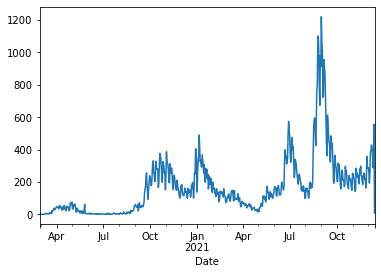

In [10]:
df_local[df_local['CAName']=='Glasgow City']['DailyPositive'].plot()

In [11]:
# df_local.to_csv('df_city.csv')

In [12]:
sorted(df_local['CAName'].unique().tolist()).index('Glasgow City')

14

In [13]:
df_local.columns.tolist()

['CA',
 'CAName',
 'DailyPositive',
 'CumulativePositive',
 'CrudeRatePositive',
 'CrudeRate7DayPositive',
 'DailyDeaths',
 'CumulativeDeaths',
 'CrudeRateDeaths',
 'DailyNegative',
 'CumulativeNegative',
 'CrudeRateNegative',
 'TotalTests',
 'PositiveTests',
 'PositivePercentage',
 'PositivePercentage7Day',
 'TotalPillar1',
 'TotalPillar2',
 'PositivePillar1',
 'PositivePillar2']

In [352]:
gov_uk_hospital_scot=pd.read_csv('https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=nation;areaName=Scotland&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22hospitalCases%22:%22hospitalCases%22%7D&format=csv',index_col='date',parse_dates=True)

In [353]:
df_hospital=pd.read_csv('https://www.opendata.nhs.scot/dataset/b318bddf-a4dc-4262-971f-0ba329e09b87/resource/2dd8534b-0a6f-4744-9253-9565d62f96c2/download/trend_hb_20211210.csv', index_col='Date',parse_dates=True)
gov_uk_hospital_scot=pd.read_csv('https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=nation;areaName=Scotland&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22hospitalCases%22:%22hospitalCases%22%7D&format=csv',index_col='date',parse_dates=True)


In [354]:
df_hospital=df_hospital[df_hospital['HBName']=='Scotland']

In [17]:
gov_uk_hospital_scot

,areaType,areaName,areaCode,hospitalCases
date,,,,
2021-12-14,nation,Scotland,S92000003,541
2021-12-13,nation,Scotland,S92000003,561
2021-12-12,nation,Scotland,S92000003,541
2021-12-11,nation,Scotland,S92000003,552
2021-12-10,nation,Scotland,S92000003,573
...,...,...,...,...
2020-03-31,nation,Scotland,S92000003,752
2020-03-30,nation,Scotland,S92000003,627
2020-03-29,nation,Scotland,S92000003,565


In [18]:
df_hospital

,HB,HBName,DailyPositive,CumulativePositive,CrudeRatePositive,CrudeRate7DayPositive,DailyDeaths,CumulativeDeaths,CrudeRateDeaths,DailyNegative,...,PositivePercentage,PositivePercentage7Day,TotalPillar1,TotalPillar2,HospitalAdmissions,HospitalAdmissionsQF,ICUAdmissions,ICUAdmissionsQF,PositivePillar1,PositivePillar2
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-28,S92000003,Scotland,1,1,0.018295,NaN,0,0,0.000000,121,...,1.219512,NaN,164,0,NaN,:,NaN,:,2,0
2020-02-29,S92000003,Scotland,0,1,0.018295,NaN,0,0,0.000000,63,...,0.000000,NaN,90,0,NaN,:,NaN,:,0,0
2020-03-01,S92000003,Scotland,2,3,0.054885,NaN,0,0,0.000000,72,...,2.173913,NaN,92,0,6.0,NaN,NaN,:,2,0
2020-03-02,S92000003,Scotland,1,4,0.073180,NaN,0,0,0.000000,190,...,1.515152,NaN,264,0,11.0,NaN,NaN,:,4,0
2020-03-03,S92000003,Scotland,3,7,0.128064,NaN,0,0,0.000000,209,...,2.083333,NaN,288,0,13.0,NaN,NaN,:,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-10,S92000003,Scotland,3680,766635,14025.521405,436.205635,5,9740,178.192462,7249,...,9.949705,9.258206,10638,28730,46.0,NaN,3.0,NaN,188,3729
2021-12-11,S92000003,Scotland,3138,769773,14082.930845,454.793267,2,9742,178.229052,5446,...,12.334028,9.460943,5534,21805,34.0,NaN,2.0,NaN,159,3213
2021-12-12,S92000003,Scotland,3209,772982,14141.639224,468.093670,2,9744,178.265642,4697,...,12.957502,9.662192,6041,20407,NaN,:,5.0,NaN,137,3290


In [19]:
gov_uk_hospital_scot['hospitalCases']

date
2021-12-14    541
2021-12-13    561
2021-12-12    541
2021-12-11    552
2021-12-10    573
             ... 
2020-03-31    752
2020-03-30    627
2020-03-29    565
2020-03-28    511
2020-03-27    404
Name: hospitalCases, Length: 628, dtype: int64

In [20]:
df_hospital['HospitalAdmissions']

Date
2020-02-28     NaN
2020-02-29     NaN
2020-03-01     6.0
2020-03-02    11.0
2020-03-03    13.0
              ... 
2021-12-10    46.0
2021-12-11    34.0
2021-12-12     NaN
2021-12-13     NaN
2021-12-14     NaN
Name: HospitalAdmissions, Length: 656, dtype: float64

<AxesSubplot:>

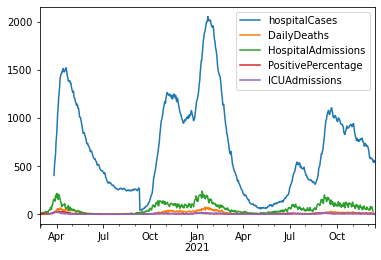

In [21]:
pd.concat([gov_uk_hospital_scot['hospitalCases'],df_hospital[['DailyDeaths','HospitalAdmissions','PositivePercentage','ICUAdmissions']]],axis=1).plot()

<AxesSubplot:xlabel='Date'>

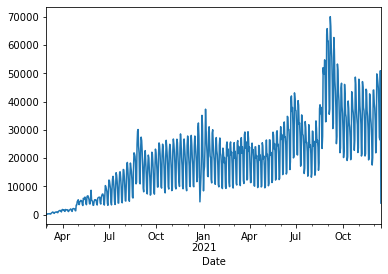

In [22]:
df_hospital['TotalTests'].plot()

In [23]:
# gov_uk_hospital_scot.to_csv('gov_uk_hospital_scot.csv')

In [24]:
df_local.columns

Index(['CA', 'CAName', 'DailyPositive', 'CumulativePositive',
       'CrudeRatePositive', 'CrudeRate7DayPositive', 'DailyDeaths',
       'CumulativeDeaths', 'CrudeRateDeaths', 'DailyNegative',
       'CumulativeNegative', 'CrudeRateNegative', 'TotalTests',
       'PositiveTests', 'PositivePercentage', 'PositivePercentage7Day',
       'TotalPillar1', 'TotalPillar2', 'PositivePillar1', 'PositivePillar2'],
      dtype='object')

In [25]:
cases=df_cases['DailyCases'].iloc[-500:-5].values

In [26]:
admissions=df_hospital[df_hospital['HBName']=='Scotland']['HospitalAdmissions'].iloc[-500:-5].values

In [27]:
# Case to hospital delay: 7 days
correlation = np.correlate(cases,admissions,mode='same')
delay = np.argmax(correlation)-int(len(correlation)/2)
delay

-7

In [28]:
icu=df_hospital['ICUAdmissions'].iloc[-500:-5].values

In [29]:
# Case to hospital delay: 7 days
correlation = np.correlate(admissions,icu,mode='same')
delay = np.argmax(correlation)-int(len(correlation)/2)
delay

0

In [30]:
deaths=df_hospital['DailyDeaths'].iloc[-500:-5].values

In [31]:
# Case to hospital delay: 7 days
correlation = np.correlate(icu,deaths,mode='same')
delay = np.argmax(correlation)-int(len(correlation)/2)
delay

-7

In [32]:
# Case to hospital delay: 7 days
correlation = np.correlate(admissions,deaths,mode='same')
delay = np.argmax(correlation)-int(len(correlation)/2)
delay

-10

In [66]:
cases_ma=df_cases['DailyCases'].rolling(window=7).mean().iloc[-500:-5].values
admissions_ma=df_hospital[df_hospital['HBName']=='Scotland']['HospitalAdmissions'].rolling(window=7).mean().iloc[-500:-5].values
icu_ma=df_hospital['ICUAdmissions'].rolling(window=7).mean().iloc[-500:-5].values
deaths_ma=df_hospital['DailyDeaths'].rolling(window=7).mean().iloc[-500:-5].values

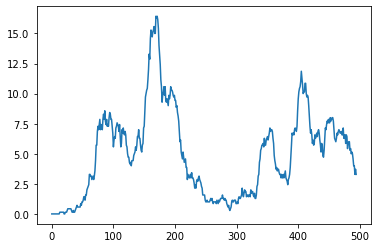

In [57]:
plt.plot(icu_ma)

(125.0, 200.0)

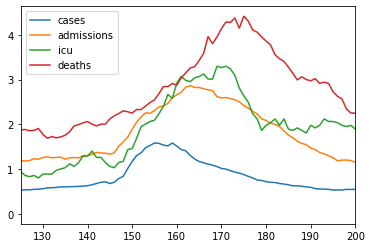

In [67]:
import matplotlib.pyplot as plt
plt.plot(cases_ma/np.mean(cases_ma),label='cases')
plt.plot(admissions_ma/np.mean(admissions_ma),label='admissions')
plt.plot(icu_ma/np.mean(icu_ma),label='icu')
plt.plot(deaths_ma/np.mean(deaths_ma),label='deaths')
plt.legend()
plt.xlim(125,200)

In [68]:
correlation = np.correlate(cases_ma,admissions_ma,mode='same')
delay = np.argmax(correlation)-int(len(correlation)/2)
delay

-6

In [69]:
correlation = np.correlate(admissions_ma,icu_ma,mode='same')
delay = np.argmax(correlation)-int(len(correlation)/2)
delay

-2

In [70]:
correlation = np.correlate(icu_ma,deaths_ma,mode='same')
delay = np.argmax(correlation)-int(len(correlation)/2)
delay

-5

In [98]:
def get_lag(x,y):
    correlation = np.correlate(x,y,mode='same')
    return np.argmax(correlation)-int(len(correlation)/2)

def get_transition_intervals(start,end):
    cases=df_cases['DailyCases'].iloc[start:end].rolling(window=7).mean().values
    admissions=df_hospital[df_hospital['HBName']=='Scotland']['HospitalAdmissions'].iloc[start:end].rolling(window=7).mean().values
    # icu=df_hospital['ICUAdmissions'].iloc[start:end].rolling(window=7).mean().values
    # deaths=df_hospital['DailyDeaths'].iloc[start:end].rolling(window=7).mean().values

    case_admission_lag=get_lag(cases,admissions)
    print(case_admission_lag)
    # admission_icu_lag=get_lag(admissions,icu)
    # icu_death_lag=get_lag(icu,deaths)

    # import matplotlib.pyplot as plt
    # plt.plot(cases/np.mean(cases),label='cases')
    # plt.plot(admissions/np.mean(admissions),label='admissions')
    # plt.plot(icu/np.mean(icu),label='icu')
    # plt.plot(deaths/np.mean(deaths),label='deaths')
    # plt.legend()
    # # plt.xlim(125,200)

    # return case_admission_lag, admission_icu_lag, icu_death_lag
    

In [99]:
get_transition_intervals(200,400)

-100


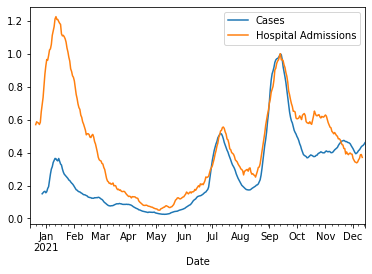

In [116]:
RANGE=365

(df_cases['DailyCases'].tail(RANGE).shift(7).rolling(window=7).mean()/np.max(df_cases['DailyCases'].tail(120).shift(5).rolling(window=7).mean())).plot(label='Cases')
(df_hospital[df_hospital['HBName']=='Scotland']['HospitalAdmissions'].tail(RANGE).rolling(window=7).mean()/np.max(df_hospital[df_hospital['HBName']=='Scotland']['HospitalAdmissions'].tail(120).rolling(window=7).mean())).plot(label='Hospital Admissions')
plt.legend()

In [355]:
cases=df_cases['DailyCases'].tail(RANGE).rolling(window=7).mean()[7:-3]
hospital=df_hospital[df_hospital['HBName']=='Scotland']['HospitalAdmissions'].tail(RANGE).rolling(window=7).mean()[7:-3]

In [356]:
cases

Date
2021-08-31    6101.285714
2021-09-01    6196.714286
2021-09-02    6240.000000
2021-09-03    6255.714286
2021-09-04    6291.428571
                 ...     
2021-12-14    4316.285714
2021-12-15    4703.714286
2021-12-16    5028.571429
2021-12-17    5287.285714
2021-12-18    5506.428571
Name: DailyCases, Length: 110, dtype: float64

In [130]:
hospital

Date
2020-12-22    96.142857
2020-12-23    95.285714
2020-12-24    94.857143
2020-12-25    93.428571
2020-12-26    95.571429
                ...    
2021-12-07    58.285714
2021-12-08    59.714286
2021-12-09    63.285714
2021-12-10    63.571429
2021-12-11    60.714286
Name: HospitalAdmissions, Length: 355, dtype: float64

<AxesSubplot:xlabel='Date'>

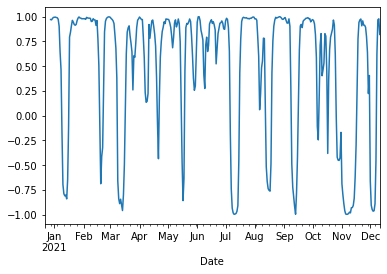

In [135]:
cases.rolling(7).corr(hospital).rolling(win)

In [357]:
df_sgtf=pd.read_csv('../data/sgtf.csv', index_col='Date',parse_dates=True)
df_sgtf.head()

,SGTF %
Date,
2021-11-23,0.001
2021-11-24,0.002
2021-11-25,0.006
2021-11-26,0.002
2021-11-27,0.002


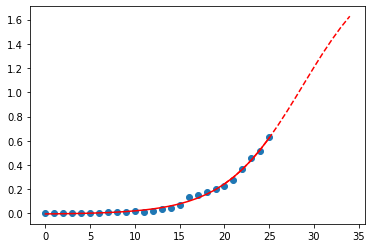

In [358]:
y_data=df_sgtf['SGTF %'].values
x_data=np.arange(0,len(y_data),1)

def func(x, L ,x0, k, b):
    return L / (1 + np.exp(-k*(x-x0)))+b

p0 = [max(y_data), np.median(x_data),1,min(y_data)] # this is an mandatory initial guess

popt, pcov = curve_fit(func, x_data, y_data,p0)

plt.plot(x_data, func(x_data, *popt), 'r-')

forecast_range=np.arange(20,35,1)
plt.plot(forecast_range, func(forecast_range, *popt), 'r-', ls='--')
# plt.set_xticks=df_sgtf['SGTF %'].index
plt.scatter(x=x_data,y=y_data)
# df_gov_sgtf_lon['percent'].tail(25).plot()
# # plt.legend()
# # plt.xlabel('Cases with SGTF %')
# # plt.ylabel('Hospitalisation Rate %')
# # plt.title('Variation in Hospitalisation Rate with Omicron/SGTF Prevalence')
# plt.ylim(0,100)
# plt.set_xticks=df_sgtf['SGTF %'].index

In [359]:
df_hospital['HospitalAdmissions'].iloc[:-3]

Date
2020-02-28     NaN
2020-02-29     NaN
2020-03-01     6.0
2020-03-02    11.0
2020-03-03    13.0
              ... 
2021-12-14    51.0
2021-12-15    64.0
2021-12-16    64.0
2021-12-17    55.0
2021-12-18    44.0
Name: HospitalAdmissions, Length: 660, dtype: float64

In [365]:
df_sgtf_analysis=pd.merge(df_hospital, df_sgtf, left_index=True, right_index=True)
df_sgtf_analysis['Hosp+7D']=df_sgtf_analysis['HospitalAdmissions'].shift(7)
df_sgtf_analysis['Hosp_rate']=100*(df_sgtf_analysis['Hosp+7D']/df_sgtf_analysis['DailyPositive'])
df_sgtf_analysis['SGTF %']=100*df_sgtf_analysis['SGTF %']

In [372]:
df_sgtf_analysis=df_sgtf_analysis[['SGTF %', 'Hosp_rate']]
df_sgtf_analysis=df_sgtf_analysis[df_sgtf_analysis['SGTF %']>7]
df_sgtf_analysis=df_sgtf_analysis.dropna()

Text(0.5, 1.0, 'Variation in Hospitalisation Rate with Omicron/SGTF Prevalence')

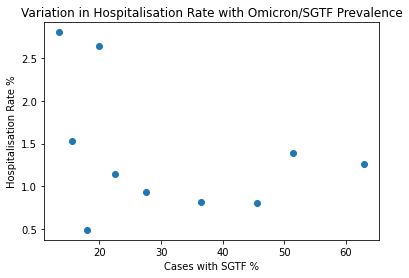

In [373]:
plt.scatter(x=df_sgtf_analysis['SGTF %'],y=df_sgtf_analysis['Hosp_rate'])
plt.xlabel('Cases with SGTF %')
plt.ylabel('Hospitalisation Rate %')
plt.title('Variation in Hospitalisation Rate with Omicron/SGTF Prevalence')

In [374]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c
    # a*np.exp(b*x)

# def func(x, a, c):
#     return a * x + c

popt, pcov = curve_fit(func, df_sgtf_analysis['SGTF %'], df_sgtf_analysis['Hosp_rate'])

c:\Users\cwallace\Temp\venv3.74\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Variation in Hospitalisation Rate with Omicron/SGTF Prevalence')

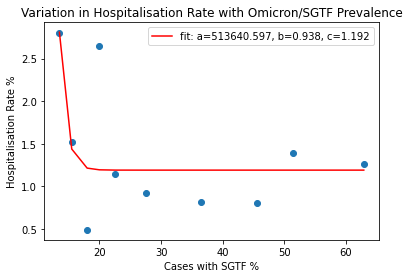

In [375]:
plt.plot(df_sgtf_analysis['SGTF %'], func(df_sgtf_analysis['SGTF %'], *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.scatter(x=df_sgtf_analysis['SGTF %'],y=df_sgtf_analysis['Hosp_rate'])
plt.legend()
plt.xlabel('Cases with SGTF %')
plt.ylabel('Hospitalisation Rate %')
plt.title('Variation in Hospitalisation Rate with Omicron/SGTF Prevalence')

In [293]:
df_sgtf_analysis

,SGTF %,Hosp_rate
Date,,
2021-09-12,13.5,2.803460
2021-10-12,15.5,1.526718
2021-11-12,18.0,0.490025
2021-12-12,20.0,2.645026
2021-12-13,22.6,1.143470
2021-12-14,27.5,0.928297
2021-12-15,36.5,0.819792
2021-12-16,45.5,0.803213


In [450]:
df_gov_sgtf=pd.read_csv('https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1043241/sgtf_regionepicurve_2021-12-21.csv',index_col='specimen_date',parse_dates=True)

In [451]:
df_gov_sgtf_lon=df_gov_sgtf[(df_gov_sgtf['UKHSA_region']=='London') & (df_gov_sgtf['sgtf']=='Cases with confirmed SGTF')]

In [474]:
df_gov_sgtf

,UKHSA_region,n,percent,sgtf,total,conf_low,conf_high
specimen_date,,,,,,,
2021-01-11,East Midlands,874,100.00,Cases with confirmed S-gene,874,99.454454,100.000000
2021-02-11,East Midlands,724,99.86,Cases with confirmed S-gene,725,99.109120,99.992800
2021-02-11,East Midlands,1,0.14,Cases with confirmed SGTF,725,0.007200,0.890880
2021-03-11,East Midlands,757,100.00,Cases with confirmed S-gene,757,99.370567,100.000000
2021-04-11,East Midlands,598,100.00,Cases with confirmed S-gene,598,99.204289,100.000000
...,...,...,...,...,...,...,...
2021-12-17,Yorkshire and Humber,2129,60.47,Cases with confirmed SGTF,3521,58.825985,62.082556
2021-12-18,Yorkshire and Humber,1166,34.98,Cases with confirmed S-gene,3333,33.367701,36.634191
2021-12-18,Yorkshire and Humber,2167,65.02,Cases with confirmed SGTF,3333,63.365809,66.632299


<AxesSubplot:xlabel='specimen_date'>

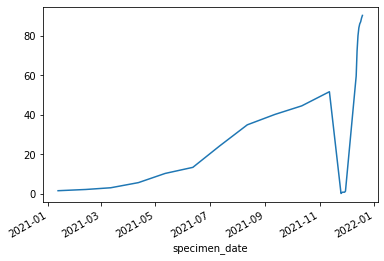

In [453]:
df_gov_sgtf_lon['percent'].tail(25).plot()

In [454]:
y_data=df_gov_sgtf_lon['percent'].tail(25).values
x_data=np.arange(0,len(y_data),1)

def func(x, L ,x0, k, b):
    return L / (1 + np.exp(-k*(x-x0)))+b

p0 = [max(y_data), np.median(x_data),1,min(y_data)] # this is an mandatory initial guess

popt, pcov = curve_fit(func, x_data, y_data,p0)

(0.0, 100.0)

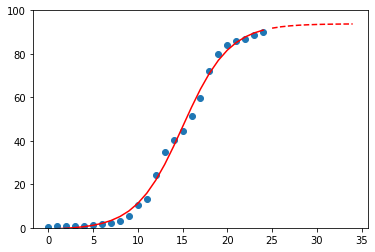

In [455]:
plt.plot(x_data, func(x_data, *popt), 'r-')

forecast_range=np.arange(25,35,1)
plt.plot(forecast_range, func(forecast_range, *popt), 'r-', ls='--')

plt.scatter(x=x_data,y=y_data)
# df_gov_sgtf_lon['percent'].tail(25).plot()
# # plt.legend()
# # plt.xlabel('Cases with SGTF %')
# # plt.ylabel('Hospitalisation Rate %')
# # plt.title('Variation in Hospitalisation Rate with Omicron/SGTF Prevalence')
plt.ylim(0,100)

In [456]:
london_cases=pd.read_csv('https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=region;areaName=London&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newCasesBySpecimenDate%22:%22newCasesBySpecimenDate%22,%22cumCasesBySpecimenDate%22:%22cumCasesBySpecimenDate%22%7D&format=csv',index_col='date',parse_dates=True)

In [457]:
london_hospital_admissions=pd.read_csv('https://coronavirus.data.gov.uk/api/v1/data?filters=areaType=nhsRegion;areaName=London&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newAdmissions%22:%22newAdmissions%22,%22cumAdmissions%22:%22cumAdmissions%22%7D&format=csv',index_col='date',parse_dates=True)

In [470]:
# london_sgtf_analysis=pd.merge(london_hospital_admissions, london_cases, left_index=True, right_index=True)
# london_sgtf_analysis=pd.merge(london_sgtf_analysis,df_gov_sgtf_lon,left_index=True,right_index=True)
london_sgtf_analysis=pd.merge(london_hospital_admissions['newAdmissions'],london_cases['newCasesBySpecimenDate'],left_index=True,right_index=True)
london_sgtf_analysis=pd.merge(london_sgtf_analysis,df_gov_sgtf_lon['percent'].tail(20),left_index=True,right_on='specimen_date')

In [471]:
london_sgtf_analysis['Hosp+7D']=london_sgtf_analysis['newAdmissions'].shift(7)
london_sgtf_analysis['Hosp_rate']=100*(london_sgtf_analysis['Hosp+7D']/london_sgtf_analysis['newCasesBySpecimenDate'])
london_sgtf_analysis['SGTF %']=london_sgtf_analysis['percent']
# london_sgtf_analysis=london_sgtf_analysis[london_sgtf_analysis['SGTF %']>1]

In [472]:
london_sgtf_analysis.columns

Index(['newAdmissions', 'newCasesBySpecimenDate', 'percent', 'Hosp+7D',
       'Hosp_rate', 'SGTF %'],
      dtype='object')

(0.0, 10.0)

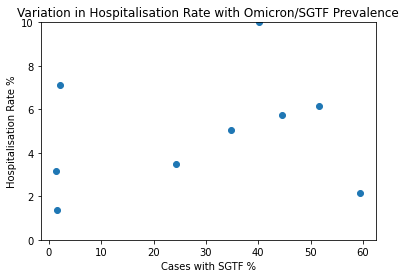

In [473]:
plt.scatter(x=london_sgtf_analysis['SGTF %'],y=london_sgtf_analysis['Hosp_rate'])
plt.xlabel('Cases with SGTF %')
plt.ylabel('Hospitalisation Rate %')
plt.title('Variation in Hospitalisation Rate with Omicron/SGTF Prevalence')
# plt.yscale('log')
plt.ylim(0,10)

<AxesSubplot:xlabel='date'>

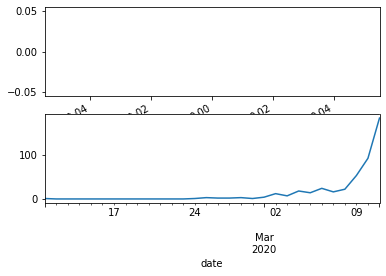

In [468]:
plt.subplot(2,1,1)
# london_sgtf_analysis['newAdmissions'].head(20).plot()
london_hospital_admissions['newAdmissions'].loc['01-12-2021':'22-12-2021'].plot()
plt.subplot(2,1,2)
london_cases['newCasesBySpecimenDate'].tail(30).plot()

In [420]:
london_sgtf_analysis=pd.merge(london_hospital_admissions['newAdmissions'],london_cases['newCasesBySpecimenDate'],left_index=True,right_index=True)
london_sgtf_analysis=pd.merge(london_sgtf_analysis,df_gov_sgtf_lon['percent'].tail(20),left_index=True,right_on='specimen_date')

In [447]:
london_sgtf_analysis=pd.merge(london_sgtf_analysis,df_gov_sgtf_lon['percent'].tail(20),left_index=True,right_on='specimen_date')

<AxesSubplot:xlabel='specimen_date'>

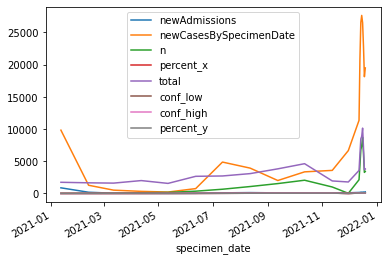

In [449]:
london_sgtf_analysis.tail(20).plot()

<AxesSubplot:xlabel='specimen_date'>

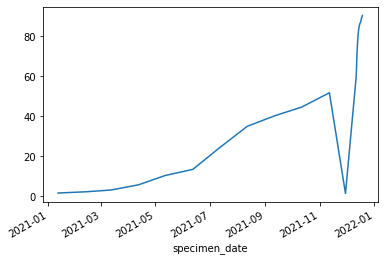

In [446]:
df_gov_sgtf_lon['percent'].tail(20).plot()